# 1. Maximun allowed tonnes per keys

In [7]:
import math
# Start data
p = 2500
alpha = 5
secure_coef = 1.5
N_eels = 2
f0 = 0.025

In [8]:
#las funciones sen y cos esperan radianes como inputs
alpha_rad = math.radians(5)

F_key = p*secure_coef*(math.sin(alpha_rad)-(f0*math.cos(alpha_rad)))/(N_eels)
print(F_key)

116.72039117880848


# 2. thrust and k_spr distance determination. Heave checking

We determine de weight moment regard bow saints

In [9]:
d_x = 2.6+25+4 #d_x = xg + L_rectangulo/2 + (L_proa - L_spr)
d_y = 4.5+1 #d_y = kg + h_anguila

M_p_spr = p * (d_x*math.cos(alpha_rad)+d_y*math.sin(alpha_rad))
print (M_p_spr)

79897.7726120282


## 2.1 How to get the wet volume and thrust

The stern has different shape from the middle ship's deck like we can see in the figures. 

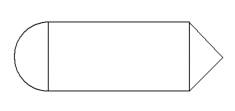      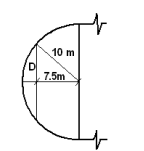

We get the beams around de circle with Pythagoras theorem and them integrate the B*T wet surface with Simpson method, but we need to regard an adjustment in step parameter (h) for the diferrent shapes. The next figure show the wet surface that we are going to calculate, and the distances that we know and/or we will determine them later.

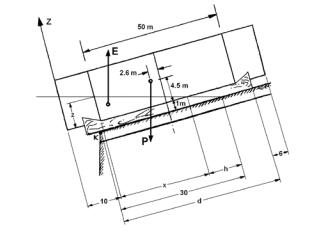

In [10]:
# determine circles radius per 'x' instances
from launchingpy.maths_custom_methods import pythagoras_method

a = [10,7.5,5,2.5,0] # length between point integration and the end of stern
hyp = 10 #hypotenuse which is the circle radius.

b = pythagoras_method(a,hyp)
print(b)

[0.0, 6.614378277661476, 8.660254037844387, 9.682458365518542, 10.0]


$$ section = b*z = b*x*tg(alpha)$$

In [11]:
import pandas as pd

column_names = ['section','Simpson Factor','Area Force','Lenght respect stern','Horizontal moment']
thrust_curve = pd.DataFrame(columns=column_names)

thrust_curve.head()

,section,Simpson Factor,Area Force,Lenght respect stern,Horizontal moment


In [12]:
import sympy as sp #Librería para manipular expresiones simbólicas

x = sp.symbols('x')
sections=[]
for point in a:
    for beam in b:
        section = beam*(x+point)*math.tan(alpha_rad)
        sections.append(section)

print(sections)

[0, 0.578683115567506*x + 5.78683115567506, 0.757674051565992*x + 7.57674051565992, 0.84710534204462*x + 8.4710534204462, 0.87488663525924*x + 8.7488663525924, 0, 0.578683115567506*x + 4.34012336675629, 0.757674051565992*x + 5.68255538674494, 0.84710534204462*x + 6.35329006533465, 0.87488663525924*x + 6.5616497644443, 0, 0.578683115567506*x + 2.89341557783753, 0.757674051565992*x + 3.78837025782996, 0.84710534204462*x + 4.2355267102231, 0.87488663525924*x + 4.3744331762962, 0, 0.578683115567506*x + 1.44670778891876, 0.757674051565992*x + 1.89418512891498, 0.84710534204462*x + 2.11776335511155, 0.87488663525924*x + 2.1872165881481, 0, 0.578683115567506*x, 0.757674051565992*x, 0.84710534204462*x, 0.87488663525924*x]


In [13]:
thrust_curve['section']= sections

thrust_curve.head()

,section,Simpson Factor,Area Force,Lenght respect stern,Horizontal moment
0,0,NaN,NaN,NaN,NaN
1,0.578683115567506*x + 5.78683115567506,NaN,NaN,NaN,NaN
2,0.757674051565992*x + 7.57674051565992,NaN,NaN,NaN,NaN
3,0.84710534204462*x + 8.4710534204462,NaN,NaN,NaN,NaN
4,0.87488663525924*x + 8.7488663525924,NaN,NaN,NaN,NaN
